# Job Market for Data Analyst - From Different Perspectives
Ali, Karen, Nay, Lynn, & Trip

In [53]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Historical Data - Karen

In [54]:
# Make a reference to the books.csv file path# Make  
csv_path = "CSV_Folder/combined_data.csv"

# Import the books.csv file as a DataFrame
original_df = pd.read_csv(csv_path, encoding="utf-8")
original_df.head()

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,National,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
1,Atlanta,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,53688.0,0.015
2,Atlanta,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
3,Atlanta,Quick Facts,2018-06,Job Openings,Job Openings,133775.0,0.296
4,New York City,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,61741.0,0.022


In [55]:
glassdoor_df = original_df.rename(columns = {'Dimension Type': 'Dimension_type'})
glassdoor_df.head()

,Metro,Dimension_type,Month,Dimension,Measure,Value,YoY
0,National,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
1,Atlanta,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,53688.0,0.015
2,Atlanta,Quick Facts,2018-06,U.S. Median Pay,U.S. Median Pay,52052.0,0.016
3,Atlanta,Quick Facts,2018-06,Job Openings,Job Openings,133775.0,0.296
4,New York City,Quick Facts,2018-06,Metro Median Pay,Metro Median Pay,61741.0,0.022


In [56]:
glassdoor_df.shape

(27947, 7)

In [57]:
glassdoor_df.dtypes

Metro              object
Dimension_type     object
Month              object
Dimension          object
Measure            object
Value             float64
YoY               float64
dtype: object

In [58]:
#Filter by Job Title = Data Analyst  & Data Scientist

filtered_df = glassdoor_df.query('Dimension_type == ["Job Title"]')
filtered_df = glassdoor_df[(glassdoor_df['Dimension']=='Data Analyst') | 
                           (glassdoor_df['Dimension']=='Data Scientist') |
                          (glassdoor_df['Dimension']=='Business Analyst')]
filtered_df.head()

,Metro,Dimension_type,Month,Dimension,Measure,Value,YoY
36,National,Job Title,2018-06,Business Analyst,Median Base Pay,65004.0,0.007
59,National,Job Title,2018-06,Data Scientist,Median Base Pay,94912.0,-0.002
61,National,Job Title,2018-06,Data Analyst,Median Base Pay,60374.0,0.019
120,Atlanta,Job Title,2018-06,Business Analyst,Median Base Pay,72012.0,0.007
143,Atlanta,Job Title,2018-06,Data Scientist,Median Base Pay,98512.0,-0.003


# Median Salary Trend by Month

In [59]:
period_df = filtered_df[['Month','Dimension','Value']]
period_df.head()

,Month,Dimension,Value
36,2018-06,Business Analyst,65004.0
59,2018-06,Data Scientist,94912.0
61,2018-06,Data Analyst,60374.0
120,2018-06,Business Analyst,72012.0
143,2018-06,Data Scientist,98512.0


In [60]:
#Extra - Average Median Salary by Month
month_average = period_df.groupby(["Month"]).mean()['Value']
month_average

Month
2017-06    83545.055556
2017-07    84302.000000
2017-08    84742.121212
2017-09    84328.212121
2017-10    83873.181818
2017-11    83088.909091
2017-12    84191.363636
2018-01    83674.909091
2018-02    84815.787879
2018-03    85131.181818
2018-04    85125.303030
2018-05    84700.727273
2018-06    84605.060606
2018-07    85181.393939
Name: Value, dtype: float64

In [61]:
salary_by_title= pd.DataFrame(period_df.groupby(["Month","Dimension"]).mean()['Value'])
salary_by_title.head()

Value
Month   Dimension                      
2017-06 Business Analyst   73969.833333
        Data Analyst       68989.666667
        Data Scientist    107675.666667
2017-07 Business Analyst   74477.545455
        Data Analyst       69598.636364

In [62]:
title_df = salary_by_title.reset_index().set_index('Month')

In [63]:
title_df[['Data Analyst']] = title_df.groupby('Dimension').get_group('Data Analyst')[['Value']]
title_df[['Data Scientist']] = title_df.groupby('Dimension').get_group('Data Scientist')[['Value']]
title_df[['Business Analyst']] = title_df.groupby('Dimension').get_group('Business Analyst')[['Value']]

In [64]:
grouped_by_title = title_df[['Data Analyst', 'Data Scientist', 'Business Analyst']]

In [65]:
position_graph = grouped_by_title[~grouped_by_title.index.duplicated(keep='first')]

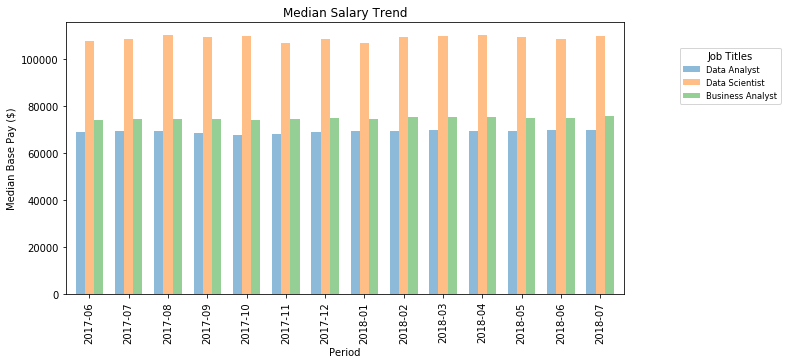

In [66]:
position_graph.plot(kind = 'bar',alpha=0.5, align='center', width = .7, figsize = (10,5))

plt.title("Median Salary Trend")
plt.xlabel("Period")
plt.ylabel("Median Base Pay ($)")

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, 
                  loc=(1.1,.7), title="Job Titles", 
                  labelspacing=0.5)

margin = 0.05

plt.savefig('trend_by_period.png')

# Median Salary Trend by Region

In [67]:
region_df = filtered_df[['Metro','Dimension','Value']]
region_df.head()

,Metro,Dimension,Value
36,National,Business Analyst,65004.0
59,National,Data Scientist,94912.0
61,National,Data Analyst,60374.0
120,Atlanta,Business Analyst,72012.0
143,Atlanta,Data Scientist,98512.0


In [68]:
salary_by_region= pd.DataFrame(region_df.groupby(["Metro","Dimension"]).mean()['Value'])
salary_by_region.head()

#region_average

Value
Metro   Dimension                     
Atlanta Business Analyst  71666.600000
        Data Analyst      65070.333333
        Data Scientist    96154.000000
Boston  Business Analyst  75578.071429
        Data Analyst      69902.571429

In [69]:
title_region_df = salary_by_region.reset_index().set_index('Metro')
#title_region_df

In [70]:
title_region_df[['Data Analyst']] = title_region_df.groupby('Dimension').get_group('Data Analyst')[['Value']]
title_region_df[['Data Scientist']] = title_region_df.groupby('Dimension').get_group('Data Scientist')[['Value']]

In [71]:
grouped_by_title2 = title_region_df[['Data Analyst', 'Data Scientist']]

In [72]:
region_graph = grouped_by_title2[~grouped_by_title2.index.duplicated(keep='first')]
region_graph

,Data Analyst,Data Scientist
Metro,,
Atlanta,65070.333333,96154.000000
Boston,69902.571429,109327.428571
Chicago,65282.857143,100557.571429
Houston,64070.285714,105633.571429
Los Angeles,71498.928571,115952.785714
National,59125.642857,95620.285714
New York City,71451.785714,113369.785714
Philadelphia,63029.071429,98255.642857
San Francisco,88754.357143,136822.000000


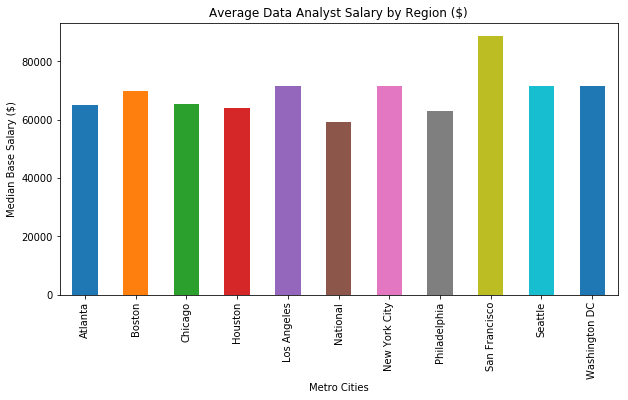

In [73]:
region_graph[['Data Analyst']].plot(kind='bar', y = 'Data Analyst', yticks = None,legend = False, 
                                    fontsize=10, figsize = (10,5))

plt.title("Average Data Analyst Salary by Region ($)")
plt.xlabel("Metro Cities")
plt.ylabel("Median Base Salary ($)")
#plt.grid(True)

plt.savefig('Data_Analyst_Cities.png')

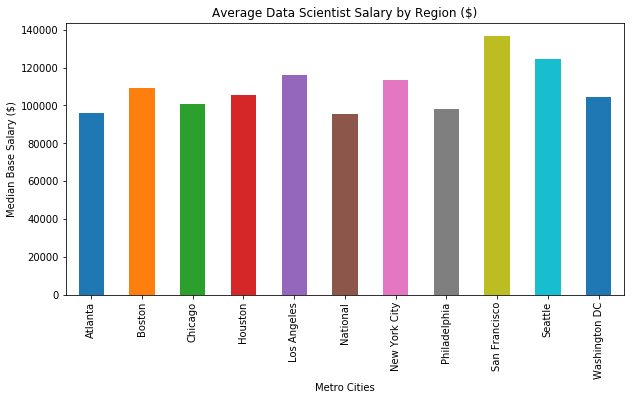

In [74]:
region_graph[['Data Scientist']].plot(kind='bar', y = 'Data Scientist', yticks = None,legend = False, 
                                      fontsize=10, figsize = (10,5))

plt.title("Average Data Scientist Salary by Region ($)")
plt.xlabel("Metro Cities")
plt.ylabel("Median Base Salary ($)")

plt.savefig('Data_Scientiest_Cities.png')

# Global / People Already in Data Science - Nay

In [75]:
data_file = "CSV_Folder/Survey.csv"
survey_df = pd.read_csv(data_file, encoding='ISO-8859-1')
survey_df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# Create New Datafram - Pick out Columns of Interest
newsurvey_df = survey_df[['Age','Country','GenderSelect', 'LanguageRecommendationSelect', 'FormalEducation', 'MajorSelect']]
newsurvey_df.head()

,Age,Country,GenderSelect,LanguageRecommendationSelect,FormalEducation,MajorSelect
0,NaN,NaN,"Non-binary, genderqueer, or gender non-conforming",F#,Bachelor's degree,Management information systems
1,30.0,United States,Female,Python,Master's degree,Computer Science
2,28.0,Canada,Male,R,Master's degree,Engineering (non-computer focused)
3,56.0,United States,Male,Python,Master's degree,Mathematics or statistics
4,38.0,Taiwan,Male,Python,Doctoral degree,Engineering (non-computer focused)


In [78]:
newsurvey_df.dtypes

Age                             float64
Country                          object
GenderSelect                     object
LanguageRecommendationSelect     object
FormalEducation                  object
MajorSelect                      object
dtype: object

In [79]:
# Average Age
average_age = newsurvey_df['Age'].mean()
average_age

32.372802734375

# Looking at Global Market

In [80]:
country_group = newsurvey_df.groupby('Country')
count_country = country_group['Country'].count()

count_country.head()

Country
Argentina     92
Australia    421
Belarus       54
Belgium       91
Brazil       465
Name: Country, dtype: int64

Text(0,0.5,'Numbers of People')

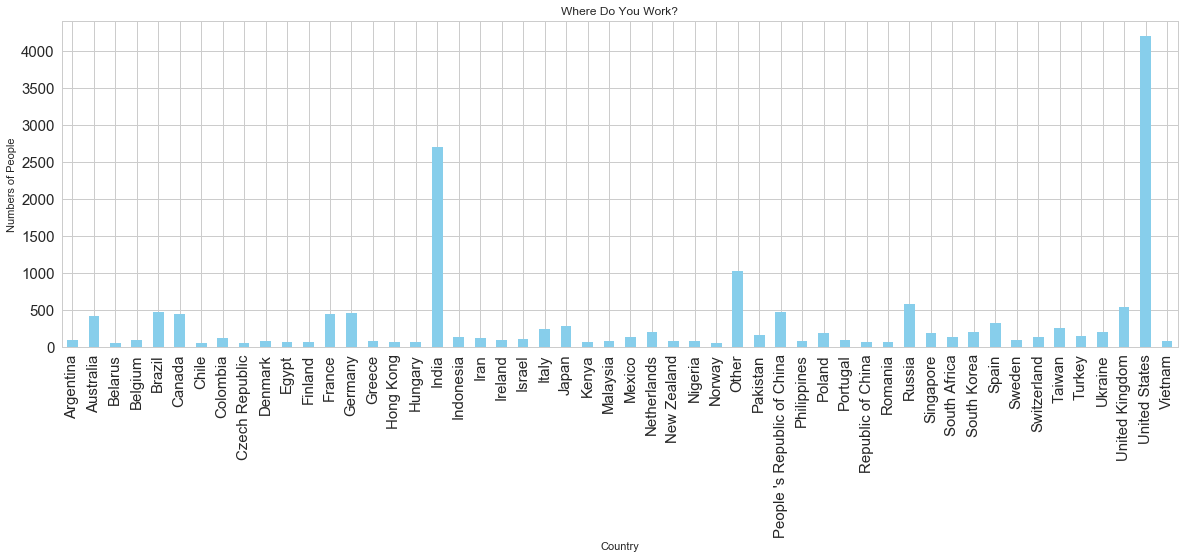

In [137]:
countries_bar = count_country.plot (kind='bar', y = 'n', yticks = None,legend = False, 
                                      fontsize=15, figsize = (20,6), color = 'skyblue')
plt.title("Where Do You Work?")
plt.xlabel("Country")
plt.ylabel("Numbers of People")


# Recommended Programming Languages

In [93]:
lang_group = survey_df.groupby('LanguageRecommendationSelect')
count_lang = lang_group['LanguageRecommendationSelect'].count()

count_lang

LanguageRecommendationSelect
C/C++/C#     307
F#             4
Haskell       17
Java         138
Julia         30
Matlab       238
Other         85
Python      6941
R           2643
SAS           88
SQL          385
Scala         94
Stata         28
Name: LanguageRecommendationSelect, dtype: int64

In [114]:
Languages = ['Python', 'R', 'SQL', 'C/C++/C#', 'Matlab', 'Java', 'Scala', 'SAS', 'Other', 'Julia', 'Stata', 'Haskell', 'F#']
Rec_count = [307, 4, 17, 138, 30, 238, 85, 6941, 2643, 88, 385, 94, 28]

Rec_count2 = sorted(Rec_count, key=int, reverse=True)

lang_df = pd.DataFrame({'Languages': Languages,'Count': Rec_count2})
lang_df

,Languages,Count
0,Python,6941
1,R,2643
2,SQL,385
3,C/C++/C#,307
4,Matlab,238
5,Java,138
6,Scala,94
7,SAS,88
8,Other,85
9,Julia,30


Text(0,0.5,'Votes')

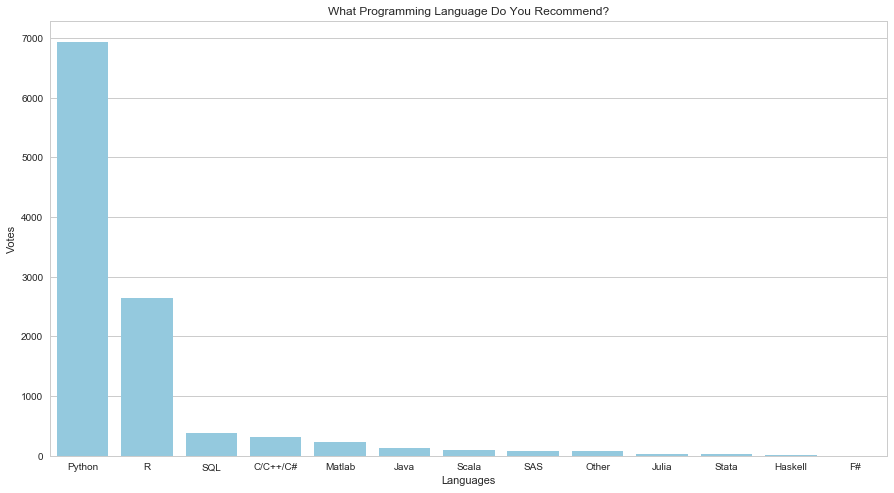

In [128]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,8))
ax = sns.barplot(x="Languages", y="Count", data=lang_df, color = 'skyblue')
ax.set_title('What Programming Language Do You Recommend?')
ax.set_ylabel('Votes')

# Formal Education

In [141]:
edu_group = newsurvey_df.groupby('FormalEducation')
count_edu = edu_group['FormalEducation'].count()

count_edu

FormalEducation
Bachelor's degree                                                    4811
Doctoral degree                                                      2346
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Master's degree                                                      6273
Professional degree                                                   451
Some college/university study without earning a bachelor's degree     786
Name: FormalEducation, dtype: int64

In [145]:
Edu = ['Bachelors', 'Doctoral', 'GED', 'No Answer', 'Masters', 'Professional', 'Some College']
Edu_count = [4811, 2346, 257, 90, 6273, 451, 786]

Edu_df = pd.DataFrame({'Formal Education': Edu ,'Count': Edu_count})
Edu_df

,Formal Education,Count
0,Bachelors,4811
1,Doctoral,2346
2,GED,257
3,No Answer,90
4,Masters,6273
5,Professional,451
6,Some College,786


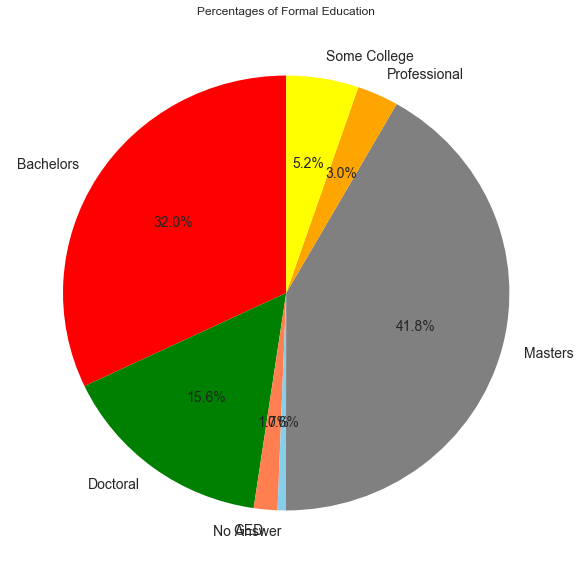

In [175]:
activities = ['Bachelors', 'Doctoral', 'GED', 'No Answer', 'Masters', 'Professional', 'Some College']
slices_hours = [4811, 2346, 257, 90, 6273, 451, 786]

fig = plt.figure(figsize=[10, 10])
plt.pie(slices_hours, labels=activities, colors=colors, startangle=90, autopct='%.1f%%', textprops={'fontsize': 14})
plt.title('Percentages of Formal Education')
plt.rcParams['font.size'] = 9.0
plt.show()

# US Job Market - Lynn

In [85]:
dice_data="CSV_Folder/dice_com_us_job_sample.csv"

# Read file into pandas data frame
dice_df = pd.read_csv(dice_data)
dice_df.head()

,advertiser_url,company,employmenttype_jobstatus,job_description,jobid,job_location,job_title,postdate,skills,uniq_id,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,https://www.dice.com/jobs/detail/Business-Syst...,"VanderHouwen & Associates, Inc.","Contract W2, Contract",VanderHouwen has more jobs you may like! Find ...,Dice Id : vhassoc,OR,Systems Analyst,7 hours ago,"AI, Maya, Browzwear, 3D",b923d29624fb4dc9e193aa30f8253ee6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.dice.com/jobs/detail/Business-Anal...,"VanderHouwen & Associates, Inc.","Full Time, Full time",PLEASE JOIN OUR TALENT NETWORK: http://bit.ly/...,Dice Id : vhassoc,WA,Business Analyst,7 hours ago,SQL,510481dba5a43cc2b77546f0dadb1ce4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.dice.com/jobs/detail/Business-Syst...,"VanderHouwen & Associates, Inc.","Contract W2, Contract",PLEASE JOIN OUR TALENT NETWORK: http://bit.ly/...,Dice Id : vhassoc,OR,Systems Analyst,7 hours ago,B2C digital product management,8d0ffe9061aa61fbd3fdfae28fa9e2b9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.dice.com/jobs/detail/Business-Anal...,SMCI,"Contract W2, 5",Job Description: Seeking a Business Process An...,Dice Id : 10301550,CA,Business Analyst,5 hours ago,"Mortgage/Equiting Lending, Lean Six Sigma Gree...",0445fcb37ab17f686c025da15a98de52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.dice.com/jobs/detail/Business-Anal...,SMCI,"C2H W2, 6",Job Description: Our banking client is looking...,Dice Id : smci,CA,Business Analyst,5 hours ago,"digital analytics, Google, Adobe, Tableau, For...",bb39139fe34f98132e057d2bc5f27ffc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Display total number of job listings in the U.S.# Displ 
combined_total_jobs = dice_df["uniq_id"].nunique()
combined_total_jobs

988

In [87]:
# Display number of listings per state
state_count = dice_df["job_location"].value_counts()
state_count

# Create a data frame that holds state cunt summary
state_count_df=pd.DataFrame(state_count)
state_count_df.head()

#Change column name from 'job_location' to 'Total Job Listings'
state_count_df = state_count_df.rename(columns={"job_location":"Total Job Listings"})
state_count_df.head()

,Total Job Listings
CA,145
NY,127
MA,98
TX,80
GA,77


<Figure size 1080x576 with 0 Axes>

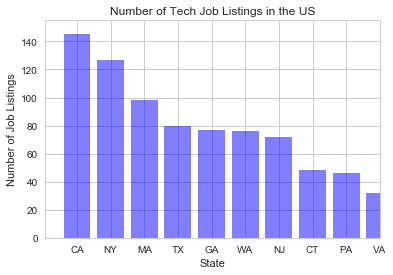

<Figure size 1080x576 with 0 Axes>

In [129]:
states = ["CA", "NY", "MA", "TX", "GA", "WA", "NJ", "CT", "PA", "VA", "IL", "MD", "FL", "MN", 
          "MI", "OH", "WI", "RI", "NC", "CO", "MO", "NE", "DC", "AZ", "NH", "DE", "SC", "LA", 
          "OR", "KS", "IA", "ME", "NV", "TN", "KY", "HI", "UT", "IN", "MD"]
state_totals = [145, 127,  98,  80,  77,  76,  72,  48,  46,  32,  27,  19,  18,
        14,  11,   9,   8,   7,   7,   7,   6,   6,   6,   5,   5,   5,
         4,   3,   3,   3,   2,   2,   2,   2,   2,   1,   1,   1,   1]
x_axis = np.arange(len(state_totals))
                
# Create a bar chart
plt.bar(x_axis, state_totals, color = 'b', alpha=0.5, align="center")

# Create the ticks for bar chart's x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states)

# Add title and labels to bar chart
plt.title ("Number of Tech Job Listings in the US")
plt.xlabel("State")
plt.ylabel("Number of Job Listings")

# Set x limits of bar chart
plt.xlim(-0.95, len(x_axis)-30)

# Set y limits of bar chart# Set y 
plt.ylim(0, max(state_totals)+10)

plt.figure(figsize=(15,8))

In [89]:
# Separate data into fields according to 'job_title' values# Separ 
grouped_jobs_df = dice_df.groupby(['job_title'])
print(grouped_jobs_df)
grouped_jobs_df.count()

,advertiser_url,company,employmenttype_jobstatus,job_description,jobid,job_location,postdate,skills,uniq_id,Unnamed: 10,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
job_title,,,,,,,,,,,,,,,,,,,,,
Big Data Analyst,2,2,2,2,2,2,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Architect,23,23,23,23,23,23,23,23,23,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Developer,17,17,17,17,17,17,17,17,17,0,...,0,0,0,0,0,0,0,0,0,0
Big Data Engineer,28,28,28,28,28,28,28,28,28,0,...,0,0,0,0,0,0,0,0,0,0
Business Analyst,235,234,234,235,235,235,235,232,235,0,...,2,2,0,0,0,0,0,0,0,0
Business Intelligence Analyst,43,43,43,43,43,43,43,43,43,0,...,0,0,0,0,0,0,0,0,0,0
Business Intelligence Analyst,2,2,2,2,2,2,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
Business Intelligence Architect,2,2,2,2,2,2,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
Business Intelligence Developer,43,43,43,43,43,43,43,43,43,0,...,1,0,0,0,0,0,0,0,0,0


# Looking at a Specific Company - Trip

# Conclusion - Ali